# Differential Equations in Julia

Here are some examples to get you started with solving (ordinary) differential equations (ODEs) in Julia using the astoundingly versatile **DifferentialEquations.jl** Library. For a more comprehensive intro, see the [documentation](https://docs.sciml.ai/dev/index.html) and especially the [tutorials](https://github.com/SciML/DiffEqTutorials.jl) which go way beyond what we will cover to include a large variety of types of differential equations and specialized solvers and capabilities.

In [1]:
using Pkg; Pkg.status() #Check what packages are available

    Status `~/.julia/environments/v1.3/Project.toml`
  [0bf59076] AdvancedHMC v0.2.21
  [28f2ccd6] ApproxFun v0.11.10
  [c52e3926] Atom v0.11.3
  [8f4d0f93] Conda v1.4.1
  [6d1b261a] DiffEqTutorials v0.3.0
  [0c46a032] DifferentialEquations v6.10.1
  [31c24e10] Distributions v0.21.12
  [f6369f11] ForwardDiff v0.10.9
  [7073ff75] IJulia v1.21.1
  [43edad99] InstantiateFromURL v0.4.0
  [a98d9a8b] Interpolations v0.12.9
  [4138dd39] JLD v0.9.2
  [e5e0dc1b] Juno v0.7.2
  [d3d80556] LineSearches v7.0.1
  [961ee093] ModelingToolkit v1.2.5
  [d41bc354] NLSolversBase v7.6.1
  [429524aa] Optim v0.20.1
  [1dea7af3] OrdinaryDiffEq v5.28.1
  [91a5bcdd] Plots v0.28.4
  [f27b6e38] Polynomials v0.7.0
  [276daf66] SpecialFunctions v0.9.0
  [f3b207a7] StatsPlots v0.13.0
  [fce5fe82] Turing v0.8.2
  [44d3d7a6] Weave v0.9.2
  [9a3f8284] Random 


In [2]:
using DifferentialEquations #Load library

In [3]:
using Plots
gr(fmt=:png); # setting for easier graph display in jupyter notebooks

Let's solve our first differential equation: to begin with, something where we know the answer: a univariate linear ODE with constant coefficients:
$$\frac{du}{dt}=f(u,t)=a\cdot u$$
With the growth rate alone, we have a family of solutions. To pin down a solution uniquely, we need one more condition, the initial value:
$$u(0)=u_0$$
Together, these two define an initial value problem, and can be solved over for the value of u at any time. For a numerical solution solved iteratively, we must declare a time span $t\in [0,T]$

In [4]:
#Declare the growth rate as a function of current value u, parameters p, and time t
f(u,p,t) = 0.05*u #Grow at a rate of 5% per unit of time
#Declare the initial condition
u0 = 1.0
#Declare the time span
T=4.0 
tspan=(0,T);

In [6]:
#Declare the problem as an ODE
prob=ODEProblem(f,u0,tspan) #You could add options here, but start with the default method

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 4.0)
u0: 1.0

In [7]:
#Now solve it! This will use the default solver, which is a higher order Runge-Kutta method, with specialized interpolation between grid points
sol=solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 4-element Array{Float64,1}:
 0.0               
 0.1820928170308875
 2.003020987339762 
 4.0               
u: 4-element Array{Float64,1}:
 1.0               
 1.0091462141683158
 1.1053378660660116
 1.2214027582015603

That's it: it solved at 4 grid points t between the start and the end, which are displayed as arrays. But note that the solution object is an interpolation, so you you can also call it at points in between.

In [8]:
@show sol[2] #Display at second grid point
@show sol(3.1) #Display at a particular time

sol[2] = 1.0091462141683158
sol(3.1) = 1.1676579612935145


1.1676579612935145

Because this is an equation where we know the true solution, we can compare and see how accurate the solver was.
Recall that for a linear ODE, the true solution is
$$u(t)=u_0\cdot e^{at}$$

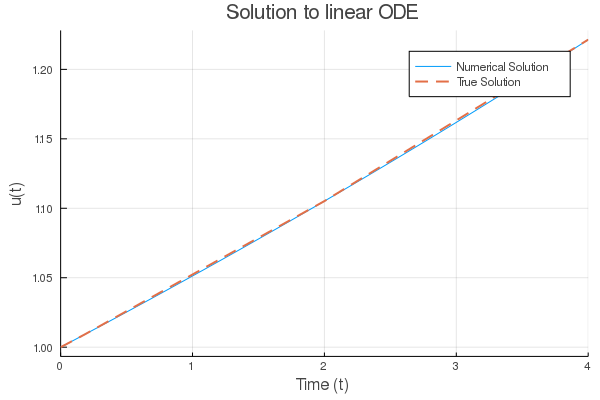

In [9]:
#Plot the numerical and true solution over the domain
plot(sol,title="Solution to linear ODE",
     xaxis="Time (t)",yaxis="u(t)",label="Numerical Solution")
plot!(sol.t, t->u0*exp(0.05t),lw=2,ls=:dash,label="True Solution")

That looks pretty good, but this was an easy problem. Iterative solvers using an explicit time step can often due very poorly if the growth rate between time steps is large (in multivariate cases, when the Jacobian of the function f is ill-conditioned), requiring very tiny time steps to get good accuracy, which makes the procedure slow and unstable. Such problems are often called **stiff** ODEs, and one tends to get a better solution using an implicit method. Let's illustrate this in the linear case and see how much difference the method makes.

In [19]:
#New problem with huge growth rate
f2(u,p,t) = 100*u #Grow 100 times per period
tspan2 = (0.0,1.0) #We will see fast growth even in a short period
stiffprob = ODEProblem(f2,u0,tspan2) #Set up problem same as before except for growth rate and span

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 1.0

In [20]:
sol2 = solve(stiffprob) #Solve using default method

retcode: Success
Interpolation: Automatic order switching interpolation
t: 92-element Array{Float64,1}:
 0.0                 
 0.01                
 0.015886584103585517
 0.023990806386257797
 0.03187440955880104 
 0.040507451249144504
 0.04943155457303975 
 0.05875355609930688 
 0.06836759767337258 
 0.07825395962881507 
 0.08836820407977286 
 0.0986805995815007  
 0.10916193586398452 
 ⋮                   
 0.8819461379718779  
 0.8933891759394816  
 0.9048322149680649  
 0.9162752550576277  
 0.9277182969660132  
 0.9391613399353784  
 0.9506043832078809  
 0.9620474275413633  
 0.9734904721779829  
 0.9849335178755827  
 0.9963765646341628  
 1.0                 
u: 92-element Array{Float64,1}:
     1.0                  
     2.718098877991472    
     4.896835573412162    
    11.012096720638647    
    24.223918246808427    
    57.43298335796197     
   140.18975337318471     
   356.0795790257159      
   931.2298630841302      
  2502.58579241936        
  6880.39853591009    

That needed 92 grid points to reach a decent measure of accuracy. Trying with an even larger growth rate led the solver to abort, as the numbers were too large relative to what can be handled in floating point.  Let's see if it led to a good solution at least by plotting against the true value.

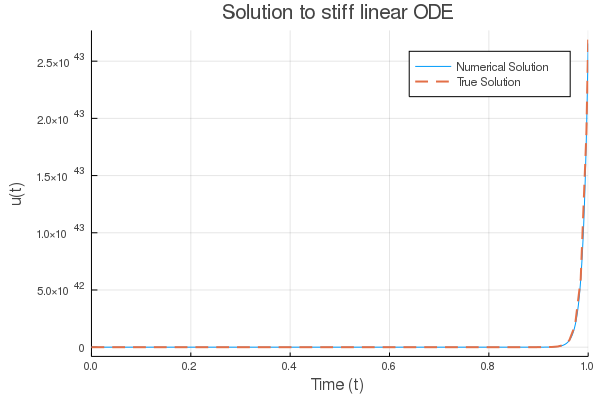

In [21]:
#Plot the numerical and true solution over the domain
plot(sol2,title="Solution to stiff linear ODE",
     xaxis="Time (t)",yaxis="u(t)",label="Numerical Solution")
plot!(sol2.t, t->u0*exp(100t),lw=2,ls=:dash,label="True Solution")

That looks mostly reasonable, by visual inspection. Now compare to numerical values, especially at the end, as errors build up over steps.

In [23]:
@show abserr = abs(sol2(1.0)-exp(100.0))
relerr = abserr/exp(100.0)

abserr = abs(sol2(1.0) - exp(100.0)) = 3.328778650760092e41


0.01238330948818367

That's so-so performance: we are a bit over 1 percent off. Now let's see if an implicit method can do better, either in speed or accuracy. In DifferentialEquations.jl, you can declare a solver explicitly, out of a huge number of options: see [the tutorial](https://tutorials.sciml.ai/html/introduction/02-choosing_algs.html) for discussion. You can also let it choose one for you, by just informing it to use a method for stiff ODEs.

In [25]:
#Tell solver to use implicit algorithm
stiffsol=solve(stiffprob,alg_hints=[:stiff])

retcode: Success
Interpolation: specialized 3rd order "free" stiffness-aware interpolation
t: 222-element Array{Float64,1}:
 0.0                 
 0.005624818578328796
 0.007829910864135425
 0.011902956139696327
 0.015180322017473534
 0.0191557460808643  
 0.023131170144255062
 0.027280744024131443
 0.03147867985531129 
 0.03576565470655686 
 0.04009766631419531 
 0.044480202242350615
 0.04889559193370005 
 ⋮                   
 0.9507352992750024  
 0.955292815530826   
 0.9598503317866496  
 0.9644078480424731  
 0.9689653642982967  
 0.9735228805541203  
 0.9780803968099439  
 0.9826379130657674  
 0.987195429321591   
 0.9917529455774146  
 0.9963104619539711  
 1.0                 
u: 222-element Array{Float64,1}:
   1.0                  
   1.754956942161094    
   2.187924073469872    
   3.2879031275612034   
   4.563016750309536    
   6.790465875590813    
  10.105250392710841    
  15.302314355286475    
  23.28451933928747     
  35.74735621853654     
  55.12851234650409  

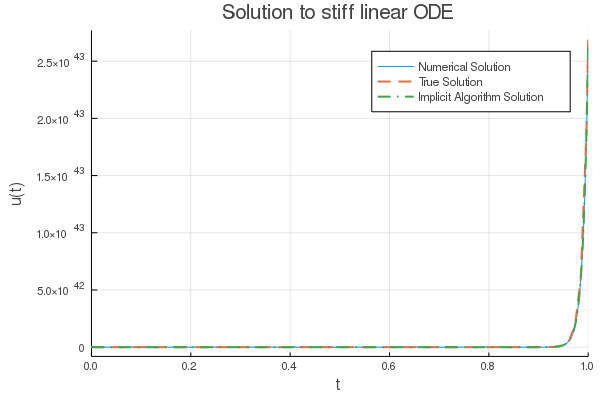

In [26]:
#Plot results, on same plot
plot!(stiffsol,lw=2,ls=:dashdot,label="Implicit Algorithm Solution")

In [27]:
#Measure results at the end
@show abserr2 = abs(stiffsol(1.0)-exp(100.0))
relerr2 = abserr2/exp(100.0)

abserr2 = abs(stiffsol(1.0) - exp(100.0)) = 7.792968483061412e40


0.0028990434835724295

That gave us about an order of magnitude relative accuracy improvement, though with many more function evaluations, which may have been more expensive due to the implicit solvers. Careful, problem-specific benchmarking would be needed to know which is the more desirable method for your application.

## 빛이 나는 Solow

One of the most basic models in economics with representation as an initial value problem is the classic Solow Growth Model, which describes the process of capital accumulation and growth for a country with fixed savings rate $s$, decreasing returns to scale technology $f(k)=Ak^{\alpha}$, and initial capital $k_0$ and depreciation rate $\delta$.  In this simple model, the capital stock of the country can be defined by the ODE
$$\dot{k}=(1-s)\cdot (Ak^{\alpha}-\delta k)$$
$$k(0)=k_0$$
Let's set this up as a parameterized function and solve.

In [43]:
function solow(u,p,t)
    A,α,δ,s = p
    return (1.0-s)*(A*u.^α .- δ*u)
end

solow (generic function with 1 method)

In [120]:
#Set some typical parameter values
A = 1.0   #A normalization
α = 1.0/3 #Nicolas Kaldor presented empirical evidence that this is a constant, though more recent work disputes that
δ = 0.03  #Substantial disputes exist about this number 
# See http://www.econ.yale.edu//smith/piketty1.pdf for discussion of its implications, from one side of an acrimonious debate
# One sentence summary: if δ=0, accumulation is unbounded, if δ>0, it stops eventually. 
# Piketty (2014) (implicitly) used the δ=0 model, and later argued it is very small. 
# Krusell and Smith in their working paper version suggested δ≈0.05, for which they were called dishonest idiots by Brad DeLong...
s = 0.08 # This fluctuates: see https://fred.stlouisfed.org/series/PSAVERT for US data
# For countries like China (and, during their fast growth periods, Korea and Japan), this number is a lot higher 

p = (A, α, δ, s) #Collect parameters

# Initial values
k0 = 20.0 #Start with a low wealth country
tspan = (0.0,600.0)

(0.0, 600.0)

In [121]:
SolowProblem=ODEProblem(solow,k0,tspan,p)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 600.0)
u0: 20.0

In [122]:
growthpath = solve(SolowProblem)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 17-element Array{Float64,1}:
   0.0                
   0.15937295413614475
   1.7531024954975922 
   7.580166601505521  
  19.764980936372623  
  34.82679530031036   
  59.69634955283559   
  86.57219865484528   
 118.310473000678     
 155.0159453404467    
 197.81314687852563   
 247.55476209676317   
 305.95424061420584   
 375.1739270523875    
 458.69467124531826   
 561.7262044659997    
 600.0                
u: 17-element Array{Float64,1}:
  20.0              
  20.310365619323093
  23.447998513038236
  35.238161509621804
  59.75500508571819 
  87.12620565951029 
 122.58169774453657 
 148.5895208831463  
 167.5237974920526  
 179.61931516179345 
 186.5751073465924  
 190.08969043633545 
 191.6422145872358  
 192.22302675561636 
 192.40035408022922 
 192.44181928959904 
 192.44599993069815 

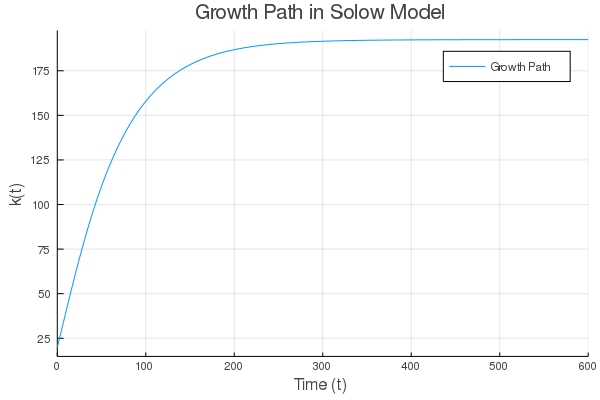

In [123]:
plot(growthpath,title="Growth Path in Solow Model",
     xaxis="Time (t)",yaxis="k(t)",label="Growth Path")

We can see why depreciation matters by noting that capital accumulation stops, $\dot{k}=0$ whenever $Ak^{\alpha}-\delta k =0$.

In [124]:
kstar = (A/δ)^(1/(1-α)) #Point at which growth no longer occurs

192.45008972987512

Note that it is not a function of $s$. However, s can make the path of getting to steady state faster.

In [125]:
s2 =0.4 #High growth country rate
p2 = (A, α, δ, s2) #Collect parameters

fastgrower = ODEProblem(solow,k0,tspan,p2)
newgrowthpath = solve(fastgrower)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 14-element Array{Float64,1}:
   0.0                
   0.17359688907709536
   1.909565779848049  
   9.698849598702953  
  32.18951904298974   
  56.131335341219014  
 100.27473984201353   
 142.20402722964883   
 194.72329378326458   
 253.1136969619443    
 322.4395574936722    
 402.06200151332644   
 496.356264917414     
 600.0                
u: 14-element Array{Float64,1}:
  20.0              
  20.220407418477727
  22.442209694061127
  32.67603157881618 
  62.135618504068795
  90.07473068442683 
 129.06023411387554 
 153.1134105903624  
 171.13135643782002 
 181.7662237688521  
 187.77471242920151 
 190.64653980269097 
 191.86686082479872 
 192.2813273346286  

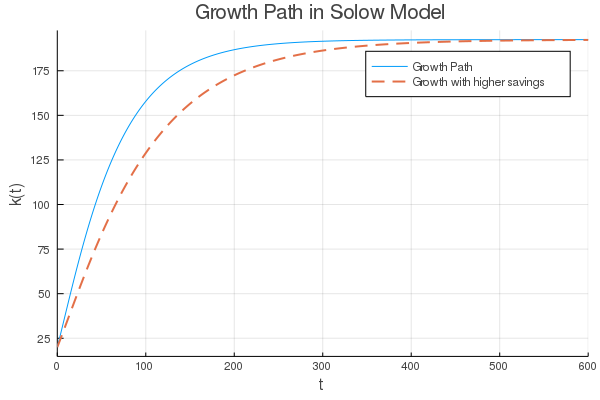

In [126]:
#Add it to the plot
plot!(newgrowthpath,lw=2,ls=:dash,label="Growth with higher savings")

This logic, showing the country with the higher savings rate reaches its steady state much earlier, has been used to argue that higher growth rates in East Asia in the late 20th century may be partially explained by their higher savings.

## Yes, SIR

To illustrate mulitvariate differential equations, we can try the classic epidemiological model of Kermack and McKendrick (1927), the SIR model, standing for the three groups in relation to a disease, the Susceptible, the Infected, and the Recovered.  This model has formulas
$$\dot{S} = -\beta SI$$
$$\dot{I} = \beta SI-\nu I$$
$$\dot{R} = \nu I$$

See <https://eehh-stanford.github.io/gceid/> for discussion.

In [127]:
function SIR!(du,u,p,t) #Note in place format, with derivatives as input, and array for solution
    β, ν = p
    du[1] = -β*u[1]*u[2]
    du[2] = β*u[1]*u[2]-ν*u[2]
    du[3] = ν*u[2]
end

SIR! (generic function with 1 method)

In [129]:
#Set parameters: not necessarily realistic
β = 1.0 #Contact rate
ν = 1/3 #Speed of recovery

p = (β,ν)

u0 = [0.99,0.01,0.0]; #Start at 1% of population infected

In [133]:
tspan = (0.0,30.0)
SIRprob = ODEProblem(SIR!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 30.0)
u0: [0.99, 0.01, 0.0]

In [134]:
SIRpath = solve(SIRprob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 20-element Array{Float64,1}:
  0.0                
  0.08745103091098928
  0.37194453371844605
  0.8124355066264694 
  1.3535083081288408 
  2.046427763463531  
  2.879891681353351  
  3.8874783757042395 
  5.092168786075673  
  6.523910211226054  
  8.073797484341561  
  9.793328984467124  
 11.948364930575533  
 13.94831239346967   
 16.646969366457647  
 19.379914620515308  
 22.165812037469724  
 25.042455821013856  
 27.990969873603234  
 30.0                
u: 20-element Array{Array{Float64,1},1}:
 [0.99, 0.01, 0.0]                                                
 [0.9891093057268222, 0.010590662223159228, 0.0003000320500185076]
 [0.9858389500591599, 0.012757070435412476, 0.001403979505427569] 
 [0.9794447684082261, 0.016982200016976222, 0.0035730315747975533]
 [0.9687406899975124, 0.024023319425824446, 0.007235990576663042] 
 [0.9487371692372807, 0.037071788007305206, 0.014191042755413956] 
 [0.911390439

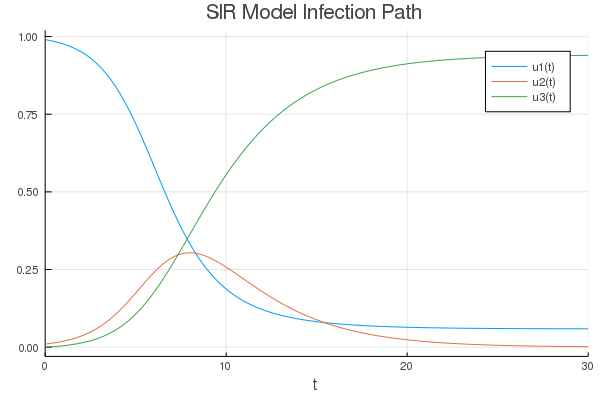

In [135]:
plot(SIRpath,title="SIR Model Infection Path")

In [136]:
#Flatten the curve
βr = 0.6 #Reduce the contact rate

p2 = (βr, ν)
SIRprob2 = ODEProblem(SIR!,u0,tspan,p2)
SIRpath2 = solve(SIRprob2)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 14-element Array{Float64,1}:
  0.0                
  0.08768338364980166
  0.5771567822665626 
  1.5075480029136656 
  2.7719378449778636 
  4.410206079686798  
  6.49108006075895   
  9.076830798526082  
 12.106041636651792  
 15.600893524745942  
 19.257354383390663  
 23.92359409241283   
 28.062533955622637  
 30.0                
u: 14-element Array{Array{Float64,1},1}:
 [0.99, 0.01, 0.0]                                                
 [0.9894733054937103, 0.01023105216027469, 0.00029564234601506413]
 [0.986308057245637, 0.011616272733061782, 0.0020756700213012623] 
 [0.979108981316261, 0.014745469955200303, 0.006145548728538749]  
 [0.9662974217743572, 0.02023965299059083, 0.013462925235051994]  
 [0.9429889227094806, 0.029983077218252895, 0.02702800007226645]  
 [0.899062423341675, 0.04740844857917739, 0.053529128079147684]   
 [0.8175191680955431, 0.07613054408771035, 0.10635028781674657]   
 [0.6896047

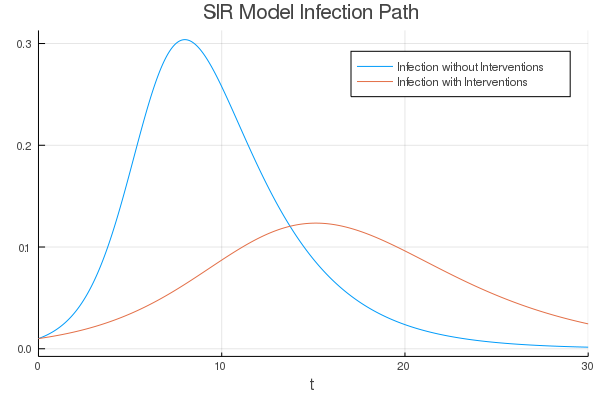

In [139]:
plot(SIRpath,vars=(0,2),label="Infection without Interventions",title="SIR Model Infection Path")
plot!(SIRpath2,vars=(0,2),label="Infection with Interventions")